In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [29]:
cd "C:\Users\Sayeed Alvi\ECEN689-Fall2018\Challenges\5Files"


C:\Users\Sayeed Alvi\ECEN689-Fall2018\Challenges\5Files


In [30]:
df_train = pd.read_csv("5challenge_training_texas_engg.sayeed21.csv")
df_train = df_train.iloc[:, 1:]
print(df_train.shape)
df_train.head()

(200, 3)


,Class,Feature 0,Feature 1
0,0,0.628806,0.292422
1,1,-0.050604,1.030436
2,0,-0.480929,0.180668
3,1,-0.608519,0.712693
4,1,1.690121,-1.752753


In [79]:
df_test = pd.read_csv("5challenge_testing_texas_engg.sayeed21.csv")
df_test = df_test.iloc[:, 1:]
print(df_test.shape)
df_test.head()


(200, 3)


,Class,Feature 0,Feature 1
0,NaN,0.696306,-0.672890
1,NaN,-1.886484,-0.123244
2,NaN,-1.093314,1.419259
3,NaN,-0.784703,0.855919
4,NaN,-0.102264,0.934982


In [80]:
X_test = df_test[['Feature 0', 'Feature 1']].values

<class 'numpy.ndarray'>
(200, 2)
(200,)


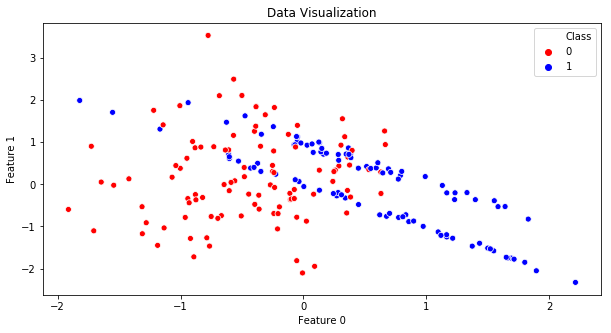

In [65]:
X = df_train[['Feature 0', 'Feature 1']].values
Y = df_train[['Class']].values
fig = plt.figure()
print(type(Y))
ax = sns.scatterplot('Feature 0', 'Feature 1', data = df_train, hue='Class', palette=["r", "b"])
ax.set_title("Data Visualization")
print(X.shape)
# print(Y.shape)
c, r = Y.shape
Y = Y.reshape(c,)
print(Y.shape)
df_train.Class.value_counts()
fig.set_size_inches(10, 5)
fig.savefig('test2png.png', dpi=100)

## GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

# Create my estimator and prepare the parameter grid dictionary
params_dict = {"C": np.logspace(-4, 6, 100), "gamma": np.linspace(0.001,10, 100), "kernel": ['rbf', 'sigmoid']}
svm = SVC()

# Fit the grid search
search = GridSearchCV(estimator=svm, param_grid=params_dict, scoring = 'accuracy', cv = 3)
search.fit(X, Y)

c:\users\sayeed alvi\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-04, 1.26186e-04, ..., 7.92483e+05, 1.00000e+06]), 'gamma': array([1.000e-03, 1.020e-01, ..., 9.899e+00, 1.000e+01]), 'kernel': ['rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 247707.6355991714, 'gamma': 0.30400000000000005, 'kernel': 'rbf'}
CV Score with best parameter values: 0.86


## Decision Boundary Visualization

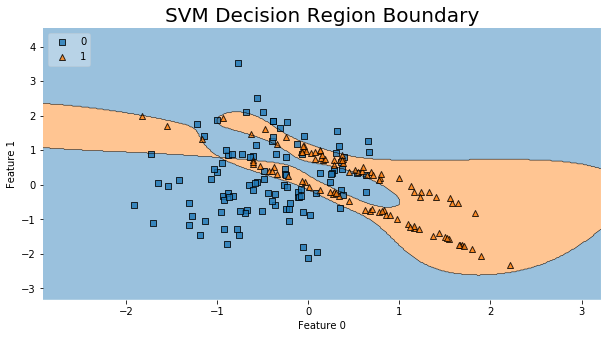

In [67]:
# Capture and fit the best estimator from across the grid search
best_svm = search.best_estimator_
best_svm.fit(X, Y)
fig2 = plt.figure()
plot_decision_regions(X,Y,clf=best_svm,legend=2)
plt.xlabel('Feature 0', size=10)
plt.ylabel('Feature 1', size=10)
plt.title('SVM Decision Region Boundary', size=20)
fig2.set_size_inches(10, 5)
fig2.savefig('decision _boundary.png', dpi=100)

In [61]:
training_accuracy = best_svm.score(X, Y)
# print "############# based on standard predict ################"
print("Accuracy on training data: %0.2f" % (training_accuracy))

Accuracy on training data: 0.91


In [87]:
# print("########################################################")
df_test['Class']= best_svm.predict(X_test)
df_test.head()
df_test.to_csv("5challenge_testing_texas_engg.sayeed21.csv")